In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
hdf = pd.read_csv('housing.csv')

In [3]:
hdf

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Осмотр данных 

In [4]:
hdf.shape

(20640, 10)

In [5]:
hdf.head() # показывает по умолчанию первые 5 строк. можно передать параметр и будет больше
# hdf.tail() # последние 5

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
hdf.info() # даёт информацию о самом дата фрейме. дает картину по столбцам

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
hdf.describe() # показывает стандартн статистические данные
# например 50 % домов имеют средний возраст 29 лет (по полю housing_median_age) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
hdf['ocean_proximity'].value_counts() # считает уникальные значения и кол-во записей по полю

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Гистограммы

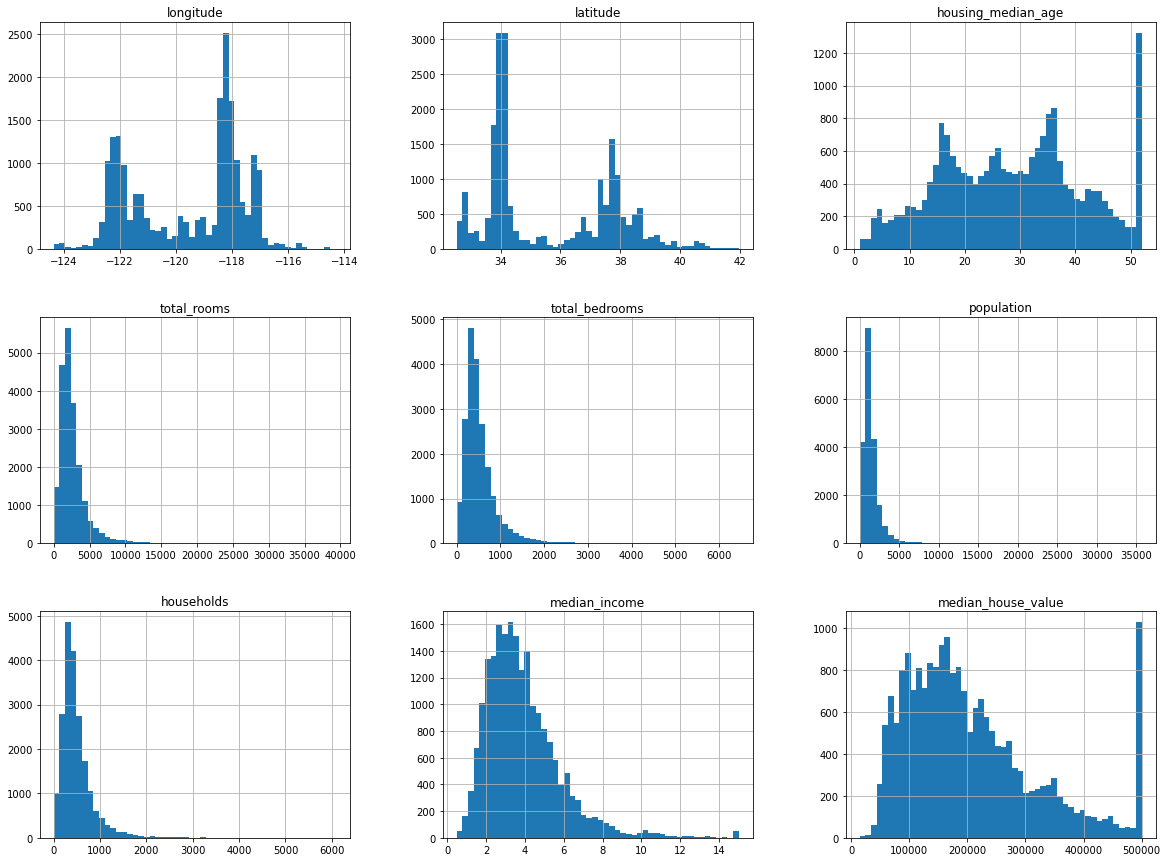

In [9]:
# median_income, median_age, median_value, масштабы и хвосты
hdf.hist(bins = 50, figsize = (20,15));
# bins - на сколько диапазонов разбиваются наши данные длядиаграммы
# figsize - размер диаграммы (картинки, которые выведутся)
# на что обратить внимание на графиках:
# 1 широта - тут вопросов нет
# 2 долгота - тут тоже вопросов нет
# 3 средний возраст дома - там где 50 большой выброс
# 4 комнаты - очень длинный хвост.
# 5 спальни - тоже длинный хвост
# 6 популяция - тоже большой хвост. плюс 35к может быть слишком большое значение. (популяция на каком то участке)
# 7 домохозяйства - тоже странное распределение количества
# 8 средний доход - странная система счисления среднего дохода
# 9 цена - выброс на 500к. - вообще это наша целевая переменная. нам надо ее прогнозировать

Визуализация графических данных

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

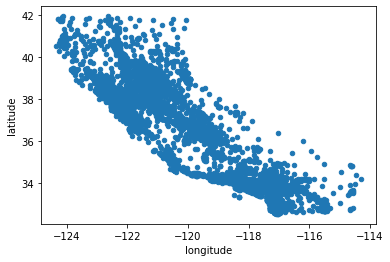

In [10]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude') # русует диаграмму рассеивания (scatter - точечная) 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

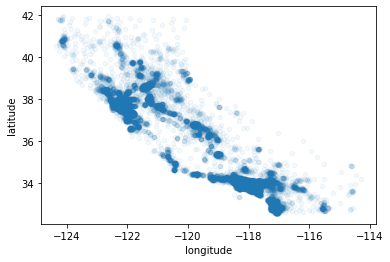

In [11]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.05)
# параметр alpha отвечает за прозрачность точек. чем больше попадают точки в одно место,
# тем сильнее цвет, т.к. точки накладываются друг на друга

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

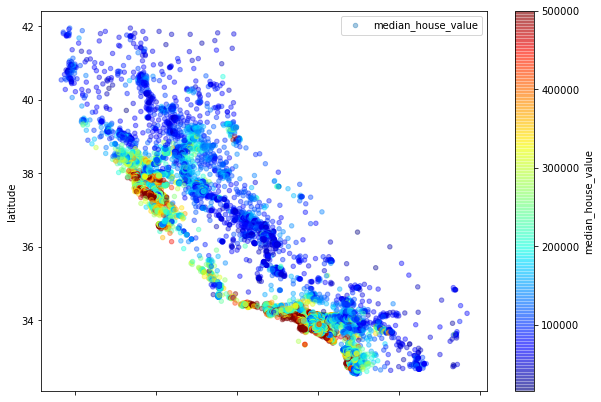

In [12]:
hdf.plot(kind='scatter', x='longitude', y = 'latitude', alpha = 0.4, label = "median_house_value", figsize = (10,7), 
             c = 'median_house_value', cmap = 'jet', colorbar = True)
# больше параметров и цвета. для лучшей видимости картинки
# красным цветом - самые дорогие дома
# cmap = 'jet' - цветовая карта
# colorbar = True - "шкала" цвета справа

Поиск зависимостей

In [13]:
corr_M = hdf.corr()
corr_M
# corr() - считаем матрицу корреляций

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [14]:
corr_M['median_house_value']
# смотрим значения для последнего столбца (наш целевой)
# больше всего зависит от median_income

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

Графическая матрица зависимостей

In [15]:
from pandas.plotting import scatter_matrix

In [16]:
attributes = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms']

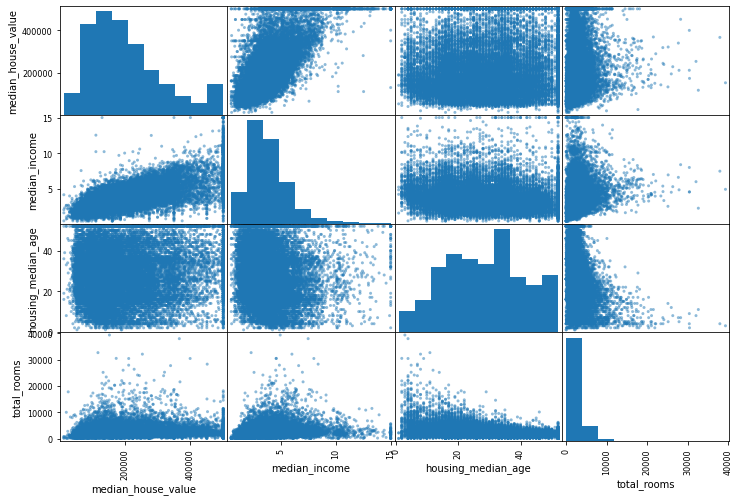

In [17]:
scatter_matrix(hdf[attributes], figsize = (12,8));
# по главной диаграмме- диаграммы распределения
# на остальных - диаграммы взаимного распределения (кореляции)

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

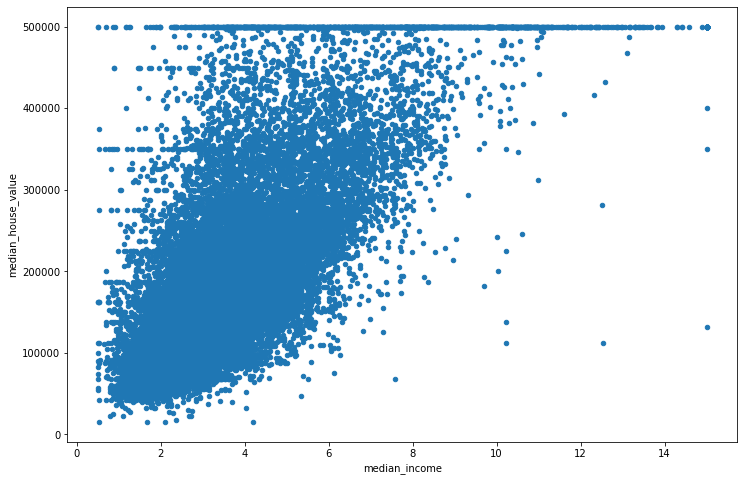

In [18]:
hdf.plot(kind='scatter', x='median_income', y = 'median_house_value', figsize = (12,8))
#  значения в 500к, какие-то горизонтальные линиии

Обработка пустых значений

In [19]:
# hdf.isnull() # возвращает тру если пустое значение
hdf.isnull().sum() # тут выводит сумму по столбцам
# какие могут быть варианты обработки пустых значений: 
# 1 - удаление строк с пустыми значениями
# 2 - удаление целого столбца
# 3 - медиана

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
#hdf.dropna(subset = ['total_bedrooms']) #удалит строки 

In [20]:
#hdf.drop(['total_bedrooms'], axis = 1) # снесет весь столбец целеком

In [20]:
# ищем реальную медиану и заполняем эти значения медианой
mediantb = hdf['total_bedrooms'].median() # расчет мединаты по столбцу. созраняем в переменную
hdf['total_bedrooms'].fillna(mediantb, inplace = True) #inplace - будет заполняться в самом датасете
# fillna - заменит значения только в пустых ячейках

#medianpbr = hdf['bebrooms_per_room'].median()
#hdf['bebrooms_per_room'].fillna(medianpbr, inplace = True)

Новые атрибуты

In [21]:
hdf['rooms_per_house'] = hdf['total_rooms'] / hdf['households']
hdf['bebrooms_per_room'] = hdf['total_bedrooms'] / hdf['total_rooms']
hdf['population_per_house_hold'] = hdf['population'] / hdf['households']

In [22]:
corr_M = hdf.corr()

In [23]:
corr_M['median_house_value']
# из новых атрибутов rooms_per_house и bebrooms_per_room играют какие то значение

longitude                   -0.045967
latitude                    -0.144160
housing_median_age           0.105623
total_rooms                  0.134153
total_bedrooms               0.049457
population                  -0.024650
households                   0.065843
median_income                0.688075
median_house_value           1.000000
rooms_per_house              0.151948
bebrooms_per_room           -0.233303
population_per_house_hold   -0.023737
Name: median_house_value, dtype: float64

In [55]:
# Отделение меток

In [24]:
X = hdf.drop(['median_house_value'], axis = 1)
# drop - сброс

In [25]:
Y = hdf['median_house_value']

Обработка категориальных признаков

In [26]:
h_cat_en, h_categories = X['ocean_proximity'].factorize()
# h_cat_en - массив, где на месте каждого слова стоит его номер от 0 до 4, т.к. у нас 5 значений
# (каждой категории присваивается порядковый номер)
# h_categories - просто список категорий

In [27]:
# h_categories
h_cat_en

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [53]:
# можем столкнуться с ситуацией, когда после кодировки признаков наша модель может запутаться, посчитав,
# что данные связаны каким-то порядком, которого на самом деле нет
# поэтому используем OneHotEncoder

In [28]:
from sklearn.preprocessing import OneHotEncoder #по номерам создает для каждого значения создает вектор из 5 столбцов
# "1"(единица) в векторе создается на том месте, что кодируется. первый эл - первый эл в матрице. 3 - третий и тд

In [29]:
oh = OneHotEncoder()

In [30]:
coded = oh.fit_transform(h_cat_en.reshape(-1,1)) # кодируем
# fit_transform - метод, который преобразует наш массив
# числа заменяются на единицы и нули, в зависимости от того, какому столбцу какое значение присуще
# тут хранит только те места, где есть единицы

In [31]:
coded.toarray() # преобразует в "обычный" массив

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [32]:
# оборачиваем в новый объект чтобы присоединить потом к нашему первоначальному дата фрейму
proxy = pd.DataFrame(coded.toarray(), index = X.index, columns = ['1','2','3','4','5'])

In [33]:
X = pd.concat([X, proxy], axis = 1) # соединяем два дата фрейма по столбцам

In [34]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_house,bebrooms_per_room,population_per_house_hold,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,6.984127,0.146591,2.555556,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,6.238137,0.155797,2.109842,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,8.288136,0.129516,2.802260,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,5.817352,0.184458,2.547945,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,6.281853,0.172096,2.181467,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,5.045455,0.224625,2.560606,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,6.114035,0.215208,3.122807,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,5.205543,0.215173,2.325635,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,5.329513,0.219892,2.123209,0.0,0.0,1.0,0.0,0.0


In [35]:
X = X.drop(['ocean_proximity'], axis = 1) #можем убрать первоначальный столбец. потому что мы его закодировали

In [36]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bebrooms_per_room,population_per_house_hold,1,2,3,4,5
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,1.0,0.0,0.0,0.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,1.0,0.0,0.0,0.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,1.0,0.0,0.0,0.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,1.0,0.0,0.0,0.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,0.0,0.0,1.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,0.0,0.0,1.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,0.0,0.0,1.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,0.0,0.0,1.0,0.0,0.0


In [68]:
# масштабирование и стандартизация значений
# это мы не запускали на занятии

# ??не совсем понимаю со стороны статистики что и зачем тут должны делать??

In [159]:
# from sklearn.preprocessing import MinMaxScaler
# mms = MinMaxScaler() #берет по каждому признаку мин и мак и приводит все значения в вид от нуля до единицы
#mms.fit_transform(X)

In [160]:
# from sklearn.preprocessing import StandardScaler
# mms = StandardScaler() # центрирование - вычитает среднее и делит на стандартное отклонение
# mm = mms.fit_transform(X)

In [105]:
# mm

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.68188905,
        -0.38446649, -0.01556621],
       [-1.32284391,  1.04318455, -0.60701891, ..., -0.68188905,
        -0.38446649, -0.01556621],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.68188905,
        -0.38446649, -0.01556621],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  1.46651424,
        -0.38446649, -0.01556621],
       [-0.87362627,  1.77823747, -0.84539315, ...,  1.46651424,
        -0.38446649, -0.01556621],
       [-0.83369581,  1.75014627, -1.00430931, ...,  1.46651424,
        -0.38446649, -0.01556621]])

Создание проверочного набора

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,  Y_test =  train_test_split(X, Y, test_size = 0.2, random_state = 42)
# test_size - 20 процентов в тестовое множество
# random_state - внутренний генератор случайных чисел(?)

# ?? что такое random_state = 42? насколько я поняла, 42 - рандомное число, которое просто обычно все ставят 42
# но что конкретно делает random_state так и не поняла

In [38]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bebrooms_per_room,population_per_house_hold,1,2,3,4,5
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,4.192201,0.289037,3.877437,0.0,0.0,1.0,0.0,0.0
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,5.039384,0.147808,2.679795,0.0,0.0,1.0,0.0,0.0
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,3.977155,0.113577,1.360332,1.0,0.0,0.0,0.0,0.0
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,6.163636,0.142576,3.444444,0.0,1.0,0.0,0.0,0.0
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,5.492991,0.185028,2.483645,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,7.002212,0.152291,2.988938,0.0,1.0,0.0,0.0,0.0
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,6.131915,0.204950,2.340426,0.0,0.0,0.0,1.0,0.0
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,7.237676,0.130868,2.790493,0.0,1.0,0.0,0.0,0.0
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,5.289030,0.185880,2.588608,0.0,0.0,1.0,0.0,0.0


READY to ROCK

In [39]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [40]:
linreg.fit(X_train, Y_train) # fit - обучение системы

LinearRegression()

In [41]:
someData = X_train[:6]
someLabels = Y_train[:6]

In [42]:
# прогноз
preds = linreg.predict(someData)

In [43]:
preds

array([181746.54359616, 290558.74973505, 244957.50017772, 146498.51061399,
       163230.42393939, 316822.43426626])

In [44]:
someLabels 

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [45]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(someLabels, preds) # сначала принято писать известные данные, потом прогнозы
rmse = math.sqrt(mse)
rmse

70468.8600682636

Дерево решений

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [51]:
tree.fit(X_train, Y_train)

DecisionTreeRegressor()

In [52]:
preds = tree.predict(someData)
preds

array([103000., 382100., 172600.,  93400.,  96500., 264800.])

In [53]:
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse
# если получается (на наших данных, на которых проверяем) 0, то это плохо. переобучение или вы передаете ещеи ответы

0.0

Случайный лес

In [ ]:
# случайный лес использует несколько деревьев. он их по разному обучает, а потом прогнозы суммируются определенным образом

In [46]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()

In [47]:
forest.fit(X_train, Y_train)

RandomForestRegressor()

In [48]:
preds = forest.predict (someData)

In [49]:
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse

14461.953895105255

GRID SEARCH

In [64]:
# подбираем количествогиперпараметров
# гиперпараметры -параметры, которые характеризуют модель (нейронная сеть - кол-во нейронов. случайные лес - количество деревьев)
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [3,10,30], 'max_features':[2,4,6,8]}
# n_estimators - сколько деревьев будет. сначала 3, потом 10,потом 30
# max_features - скольок призноков из датасета нужно отбирать. параметры выбирает система
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
# cv = 5 разбиение на 5 частей. на 4 учится, на 5 обучается

In [65]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_
# узнаем лучшее сочитание параметров
# в идеале продолжить список еще после 30 чтобы луше найти
# возвращает модель с лучшими параметрами

{'max_features': 8, 'n_estimators': 30}

In [58]:
grid_forest = grid_search.best_estimator_

In [59]:
preds = grid_forest.predict(someData)

In [61]:
preds

array([107133.33333333, 388613.43333333, 206843.33333333,  90933.33333333,
        96613.33333333, 269200.        ])

In [63]:
someLabels

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
17848    264800.0
Name: median_house_value, dtype: float64

In [60]:
mse = mean_squared_error(preds, someLabels)
rmse = math.sqrt(mse)
rmse

14477.410132679634